In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from math import exp, log, pi, sqrt, cos, sin

## Implementations of Various Brownian Motions and The Black-Scholes-Meroton Model
##### _Tanar Hernandez-Wroblewski_

In the 1905 (not so birefly titled) paper *On the Movement of Small Particles Suspended in a Stationary Liquid Demanded by the Molecular-Kinetic Theory of Heat*, Albert Einstein solved the mystery behind the "life force" dictating eratic behavior in submerged pollen particles that Robert Brown observed through his microscope years before 
in 1827.

To summarize, Einstein used the partial differential heat equation,

\begin{equation}
\frac{\partial}{\partial t} f(x,t) = \frac{1}{2}\frac{\partial ^{2}}{\partial x^{2}} f(x,t)
\end{equation}

to describe the position $x$ of a particle at time $t$ with $f(x,t)$ representing the density at $x,t$.

The solution to this heat equation is,

\begin{equation}
f(x,t) = \frac{1}{\sqrt{2\pi t}}e^{\frac{-x^{2}}{2t}}
\end{equation}

which can be recognized as the probability density function of a Guassian (Normal) Distribution. 

It wasn't until years later that Robert Weiner built off of this seminal work of Einstein to prove the existence of the mathematical object known as a Brownian Motion, a contiuous-time continuous-state stochastic process sometimes
referred to as the Weiner Process.

A formal, although greatly simplified, defintion of a __Standard Brownian Motion__ is as follows:

The continuous-time stochastic process $(B_{t})_{t\geq0}$ is a Standard Brownian Motion if it satisfies the following five properties

1. $B_{0}=0$

2. For $t>0$, $B_{t}$ follows a Normal Distribution with $\mu = 0$ and $\sigma^{2} = t$ 

3. For $s,t > 0$ $B_{t+s} - B_{s}$ follows the same distribution as $B_{t}$,

\begin{equation}
P(B_{t+s} - B_{s} \leq z) = P(B_{t} \leq z) = \int_{-\infty}^{z} \frac{1}{\sqrt{2\pi t}}e^{\frac{-x^{2}}{2t}}dx
\end{equation}

   for $-\infty<z<\infty$

4. If $0\leq q \leq r \leq s \leq t$, then $B_{t} - B_{s}$ and $B_{r} - B_{q}$ are independent random variables.

5. The function $t\mapsto B_{t}$ is continuous and has probability 1

Properties 2 through 5 are commonly referred to as: being Normally Distributed, possessing Stationary Increments, containing Indepent random variables, and adhering to continous paths respectively. As you can maybe see by now, the Gaussian Distribution plays a pivotal role in the definition of a Brownian Motion. 

This semi-rigorous defintion may be confusing to some at first, but you can simply describe a Brownian Motion as the movement of a particle the diffuses randomly along a line. With the property that as the particle travels further down the line, the movement becomes more and more _diffuse_.

In a more mathematically phrased sentence, we say; At each point $t$, the particle's position is normally distributed along the line with variance $t$ and as $t$ increases, the particle's position becomes more _diffuse_.

### The Standard Brownian Motion Visualized

We will now illustrate the simulation of 3 paths (realizations) of a Standard Brownian Motion on the interval $[0,1]$. This can be done by discretizing the time inteval, $[0,1]$ into sufficiently small subintervals of a given equal step size say, $1/n$. The order of accuracy the simulation represents is thus defined by the size of our step size. In other words, we must make $n$ large.

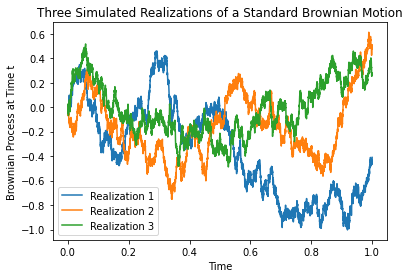

In [2]:
#Define interval size, n, number of instances to be simulated, and step size
t = 1
n = 10000
steps = np.arange(0, t, (t/n))
num_iters = 3

#Instantiate arrays for simulated points
sims = [[],[],[]]

#Loop through steps at defined step size, simulating value at each time point from a random normal
for i in range(num_iters):
    standardBrownian = np.cumsum(np.random.normal(0, np.sqrt(t/n), n))
    sims[i] = standardBrownian
    
#Plot paths
plt.plot(steps, sims[0], label = "Realization 1")
plt.plot(steps, sims[1], label = "Realization 2")
plt.plot(steps, sims[2], label = "Realization 3")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Brownian Process at Time t")
plt.title("Three Simulated Realizations of a Standard Brownian Motion")
plt.show()

### Extension to Two Dimensions

We will now expand this single dimension illustration. A two-dimensional standard Brownian Motion $(B_t)_{t \geq 0} = ((B^1_t, B^2_t))_{t \geq 0}$ with values in $\mathbb{R}^2$ is given by two one-dimensional $\mathbb{R}$-valued independent (standard) Brownian motions $(B^1_t)_{t \geq 0}$ and $(B^2_t)_{t \geq 0}$. 

Therefore to simulate a realization of a two-dimensional (standard) Brownian motion on the $\mathbb{R}^2$ plane for $t$ running from $0$ to $1$, we can conveniently expand our implementation from the single dimension case.

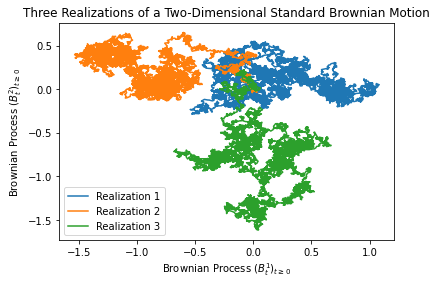

In [3]:
#Define interval size, n, number of instances to be simulated, and step size
t = 1
n = 10000
steps = np.arange(0, t, (t/n))
num_iters = 6 #need twice as many to account for the 2x increase in dimensionality

#Instantiate arrays for simulated points
sims = [[],[],[],[],[],[]]

#Loop through steps at defined step size, simulating value at each time point from a random normal
for i in range(num_iters):
    standardBrownian = np.cumsum(np.random.normal(0, np.sqrt(t/n), n))
    sims[i] = standardBrownian
    
#Plot paths
plt.plot(sims[0], sims[1], label = "Realization 1")
plt.plot(sims[2], sims[3], label = "Realization 2")
plt.plot(sims[4], sims[5], label = "Realization 3")
plt.legend()
plt.title("Three Realizations of a Two-Dimensional Standard Brownian Motion")
plt.ylabel("Brownian Process $(B^2_t)_{t \geq 0}$")
plt.xlabel("Brownian Process $(B^1_t)_{t \geq 0}$")
plt.show()

Note: the $x$ and $y$ axes now represent each simulated Brownian Path instead of time, the time interval $[0,1]$ is maintained through the use of $t$ in the calulation of the underlying Gaussian

### Adding a Layer - The Geometric Brownian Motion

You didn't think we would stop at 2 dimensions did you? As is the case for the exploration of any mathematical exploration of a topic, you start simple and slowly add on layers of complexity. We will now introduce a drift parameter into the mix, creeping our way towards the financial application.

The __Geometric Brownian Motion__ is a nonnegative process, commonly thought of as a stochastic model for exponential growth or decay. The GBM has had a prevelant history in mathematical finance due to it's property of being lognormally distributed. The eventual application to finance will be discussed in the last section, but first we must motivate the use of the GBM. A formal (but yet again simplified) definiton of a GBM is as follows,

Let $(B_t)_{t \geq 0}$ be a standard Brownian motion. For $\mu \in \mathbb{R}$ and $\sigma \in \mathbb{R}_+$, the process $(X_t)_{t \geq 0}$ defined by 

$$ X_t = \mu t + \sigma B_t \qquad (t \geq 0)$$

is called __Brownian motion with drift parameter $\mu$ and variance parameter $\sigma^2$__. Moreover, the process $(G_t)_{t \geq 0}$ defined by 

$$ G_t = G_0 \cdot e^{X_t} \qquad (t \geq 0)$$

with starting value $G_0 > 0$ is called __geometric Brownian motion__.



I will not be including the derivation, however it's worth mentioning that the mean and variance of a GBM are;

\begin{equation}
E(G_{t}) = G_{0}e^{t(\frac{\mu+\sigma^{2}}{2})}, \space Var(G_{t}) = G_{0}^{2}e^{2t(\frac{\mu+\sigma^{2}}{2})}(e^{t\sigma^{2}} - 1)
\end{equation}

Stock prices are commonly modeled using geometric brownian motion due to a few assumptions: time series data for historical stock prices indicate exponential growth or decay in the long term and due to it's lognormal distribution, the GBM can only take on positive values, much like stock prices. Assuming normal market conditions, a stock's price on a given day is with high probability close to it's price on the next day thus stock prices are not independent. However, the percent changes in stock price from day to day can be reasonably modeled as i.i.d. random variables. 

We will now illustrate the GBM with stock prices of hypothetical company ABC Inc.

Note: It is more computationaly efficient to generate the Gaussian noise to implement the Box-Muller Transform method (as opposed to Inverse Transform), defined in the the code below.

In [4]:
#Box Muller Transform
def box_muller():
    u1 = rd.random()
    u2 = rd.random()
    
    z0 = sqrt(-2 * log(u1)) * cos(2 * pi * u2)
    z1 = sqrt(-2 * log(u1)) * sin(2 * pi * u2)
              
    return z0

The implementation will generate an implementation of a Geometric Brownian Motion $(G_t)_{0 \leq t \leq T}$ with $\mu = 0.1$, $\sigma = 0.256$, $S_{0} = 1353.7$ on the time interval $[7,12]$ (i.e. $T = 7/12$). Similarly to the above two implementations, we will discretize our time interval $[0, 7/12]$ into sufficiently small subintervals of the same length, uniform step size $T/n$ with $n$ large.

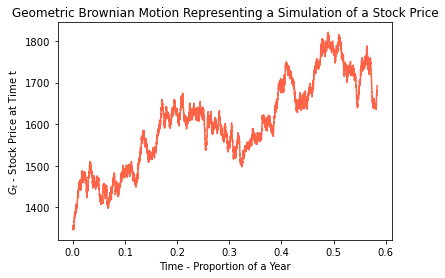

In [5]:
#Define starting price, time interval, time step, mu, sigma

G_0 = 1353.7
t = (7/12)
n = 10000
dt = t/n
g = np.zeros(n)
g[0] = G_0
mu = 0.1
sigma = 0.256
steps = np.arange(0, t, (t/n))

#Generate values of G_t
for i in range(1,n):
    
    g[i] = g[i-1] * np.exp((mu - (sigma**2) / 2)*dt + sigma * np.sqrt(dt) * box_muller())
    
#Plot 
plt.plot(steps, g, color = "tomato")
plt.ylabel("$G_{t}$ - Stock Price at Time t")
plt.xlabel("Time - Proportion of a Year")
plt.title("Geometric Brownian Motion Representing a Simulation of a Stock Price")
plt.show()

### Involving Money - Black, Scholes, and Meroton

In the Nobel Prize for Economic Sciences winning model introduced by Fisher Black, Myron Scholes, and Robert Meroton (1973) for pricing European stock-options, stock prices are modeled as Geometric Brownian Motions. A stock option is a financial contract granting the buyer the right to receive a certain pre-determined payoff at a future point in time from the option's seller. The payoff of the option typically depends on the future evolution of the underlying stock's price.

For the sake of illustration, we will examine a "lookback option" on the hypothetical ABC Inc. stock modeled above. We say that the lookback option with maturity $T = 7/12$ pays the buyer a payoff 

$$ G_{7/12} - \min_{t \, \in\, [0,7/12]} G_t$$ at time $T=7/12$, where $(G_t)_{t \geq 0}$ denotes the price process of the ABC Inc. stock.

We will approximate the future expected payoff of this particular lookback option by running $n$ (where $n$ is large) simulations. We assume that the ABC Inc. stock price follows a GBM as defined in the previous section. The code below calculates and prints the expected payoff of one such lookback option.

In [6]:
#Define necessary parameters
payoff = []
G_0 = 1353.7
t = (7/12)
n = 10000
dt = t/n
g = np.zeros(n)
g[0] = G_0
mu = 0.1
sigma = 0.256
steps = np.arange(0, t, (t/n))


#Generate values of G_t
for i in range(1,n):
    
    g[i] = g[i-1] * np.exp((mu - (sigma**2) / 2)*dt + sigma * np.sqrt(dt) * box_muller())

#Calculate Payoff
if g[n-1] < min(g):
    payoff.append(0)
    
if g[n-1] > min(g):
    payoff.append(g[n-1] - min(g))
print(payoff)

[158.76207586608348]


Discovered and robustly defined over generations, the continuous-time stochastic process, the __Brownian Motion__ plays a pivotal underlying role in mathematical finance as well as countless other fields. This short notebook comes nowhere near scratching the surface of the study of Brownian Motions and is mainly a motivating instrument for my personal study of the topic. I hope you learned something along the way and thank you if you took the time to read this far. Please reach out if you have any interest in this/related topics or further questions.